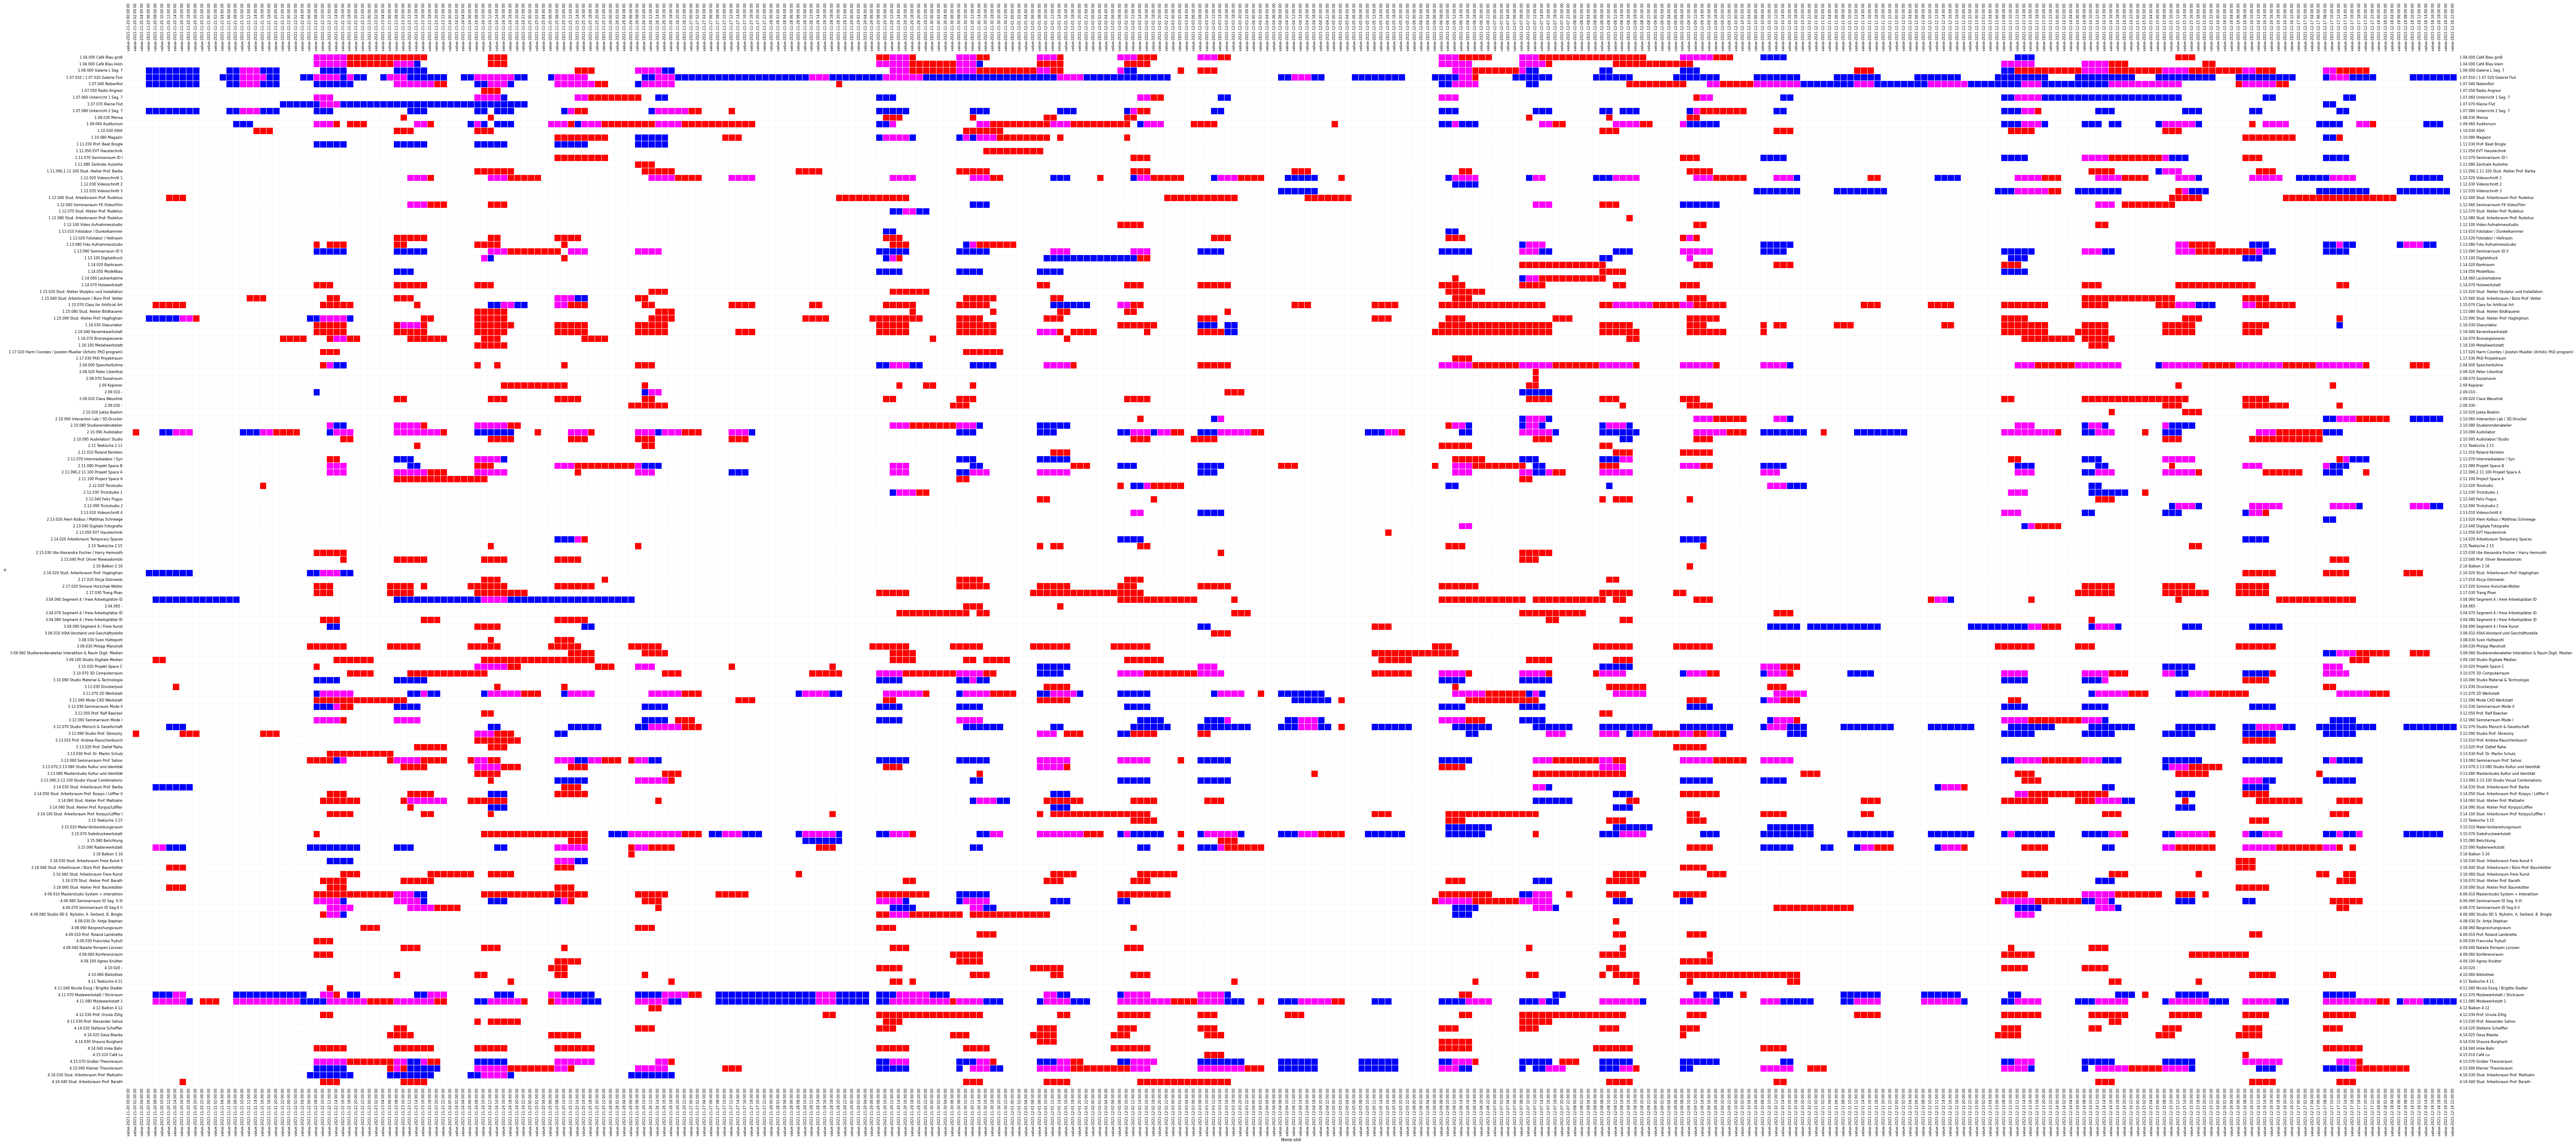

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import AutoDateFormatter, AutoDateLocator


def combine_values(x):
    if x.has_checkin > 0 and x.has_reservation > 0: return 3
    if x.has_checkin > 0: return 2;
    if x.has_reservation > 0: return 1;
    return 0;
    
    


df = pd.read_csv('data/xi.csv') 
df['slot'] = pd.to_datetime(df['slot'], format='%Y-%m-%d %H:%M:%S', errors='raise')

df['value'] = df.apply(combine_values, axis = 1)
pivot = df.pivot_table(index=['n'],columns=df['slot'],values=['value'],aggfunc='sum',fill_value=0)
fig,ax=plt.subplots(figsize=(100,45))
# print(ax)


# config axis
# ax2 = ax.twiny()
# ax2.set_xlim(ax.get_xlim())

date_form = DateFormatter("%d")

ytick_locator = AutoDateLocator()
ytick_formatter = AutoDateFormatter(ytick_locator)

# ax.xaxis.set_major_locator(ytick_locator)
# ax.xaxis.set_major_formatter(ytick_formatter)
# ax.set_xticks(data["Time"]) # sets yticks
ax.xaxis.set_tick_params(labelsize='small', labelleft=True, labelright=True, bottom=False, top=False, left=False, right=False)
ax.yaxis.set_tick_params(labelsize='small', labelbottom=True, labeltop=True, bottom=False, top=False, left=False, right=False)

sns.heatmap(pivot,cmap=["white", "blue", "red", "magenta"],ax=ax,linewidths=.5,square=True,linecolor="whitesmoke",cbar=False)

# plt.show()
plt.savefig('xi.jpg')